In [1]:
import numpy as np 
import pandas as pd
import os

train_path = 'C:/Users/mamid/OneDrive/Desktop/gradio_example/Disease-Detection-v1/archive/data/train'
validation_path = 'C:/Users/mamid/OneDrive/Desktop/gradio_example/Disease-Detection-v1/archive/data/validation'

In [32]:
train_folders = [f for f in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, f))]
print("Folders in the training dataset path:", train_folders)

validation_folders = [f for f in os.listdir(validation_path) if os.path.isdir(os.path.join(validation_path, f))]
print("Folders in the validation dataset path:", validation_folders)

Folders in the training dataset path: ['Acral_Lentiginous_Melanoma', 'blue_finger', 'clubbing', 'Healthy_Nail', 'Onychogryphosis', 'pitting']
Folders in the validation dataset path: ['Acral_Lentiginous_Melanoma', 'blue_finger', 'clubbing', 'Healthy_Nail', 'Onychogryphosis', 'pitting']


In [34]:
folders = ['blue_finger', 'Acral_Lentiginous_Melanoma', 'pitting', 'Onychogryphosis', 'clubbing', 'Healthy_Nail']

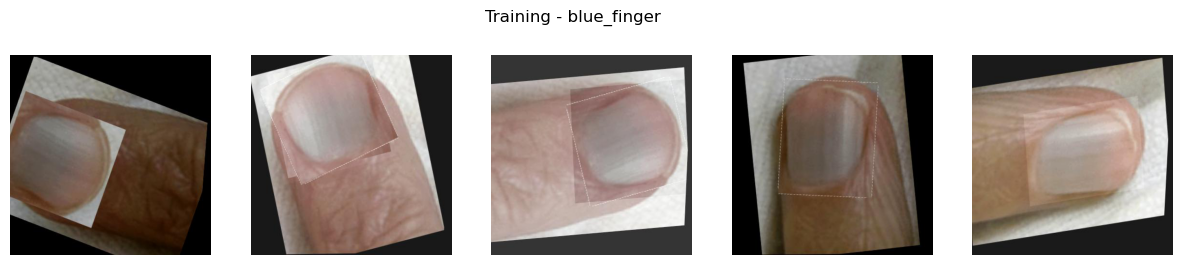

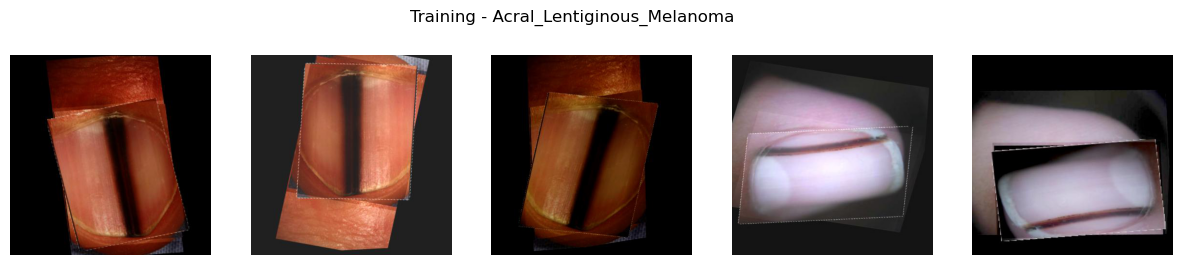

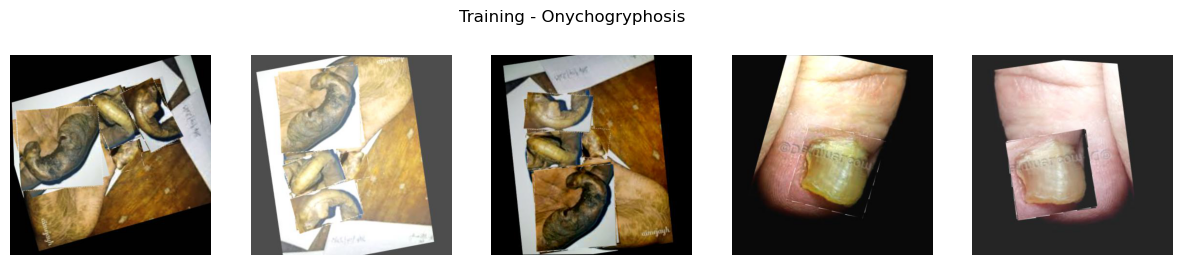

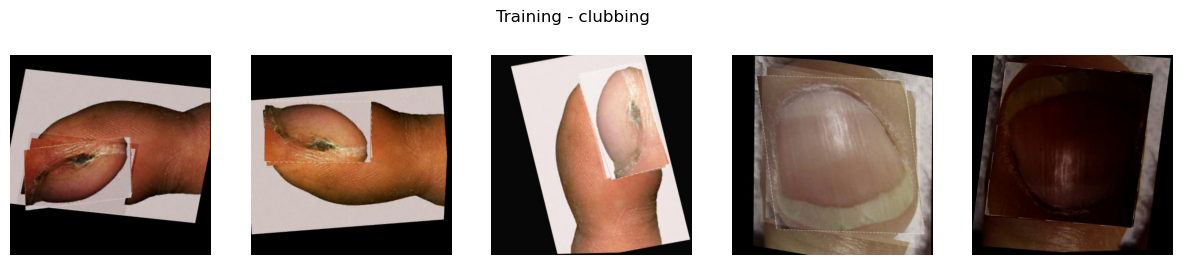

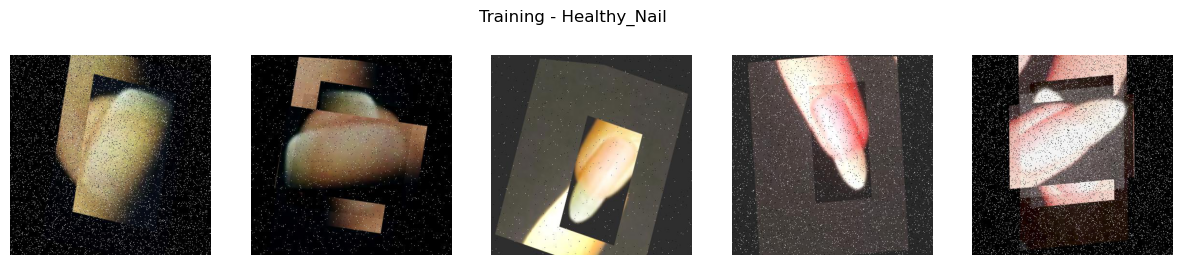

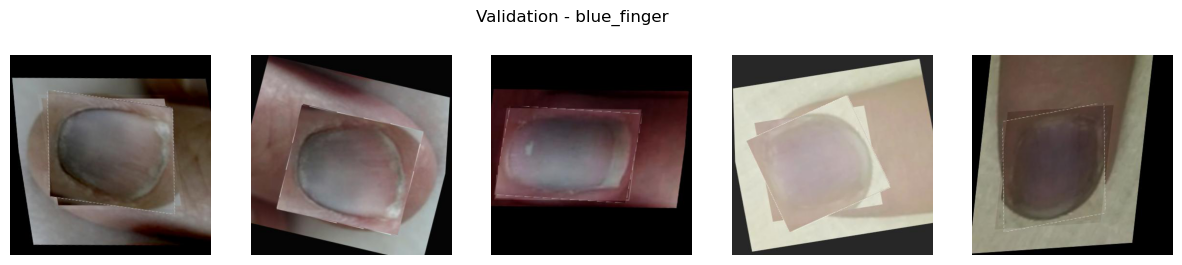

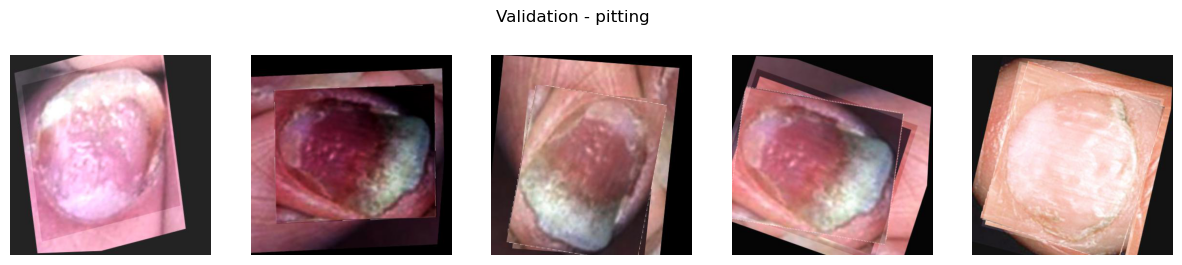

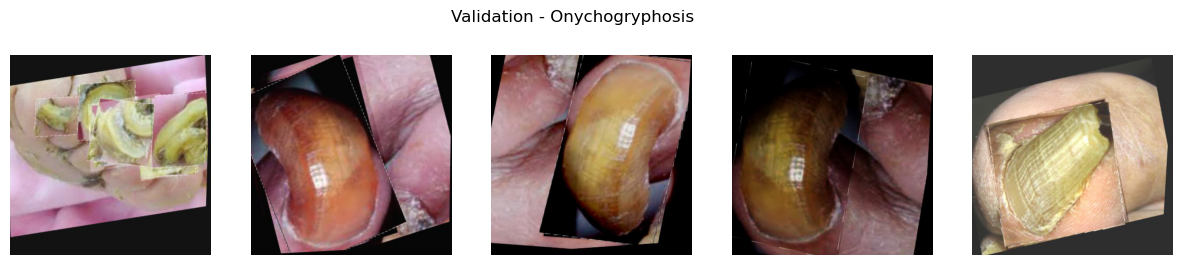

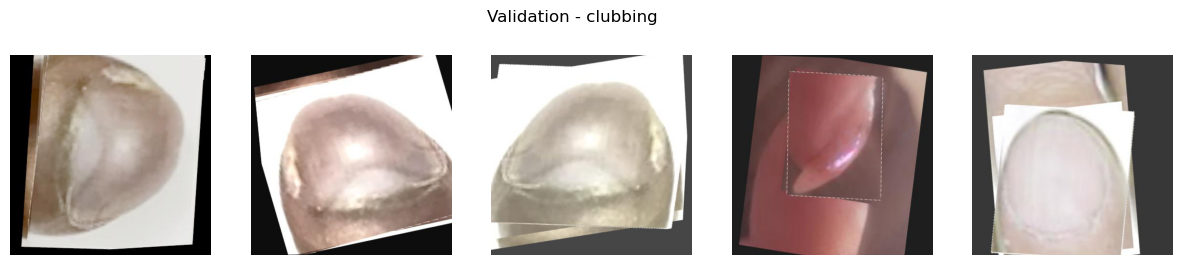

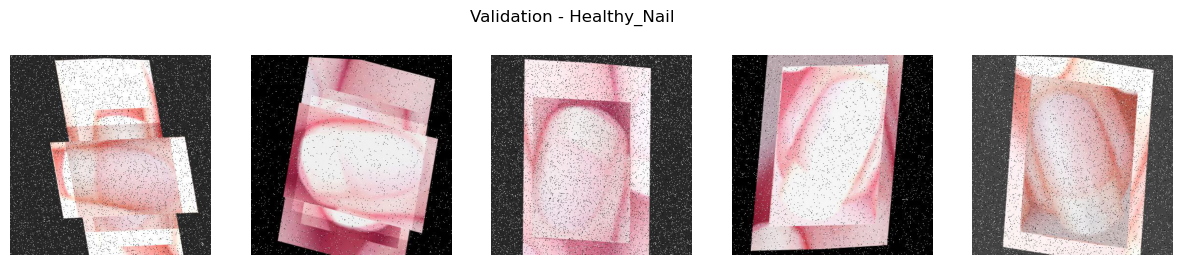

In [36]:
import matplotlib.pyplot as plt
from PIL import Image
def display_images_from_folder(folder_path, title):
    """Display up to 5 images from a specified folder."""
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    image_files = image_files[:5]  

    plt.figure(figsize=(15, 3)) 
    for i, image_file in enumerate(image_files):
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()
for folder in folders:
    folder_path = os.path.join(train_path, folder)
    display_images_from_folder(folder_path, f'Training - {folder}')

for folder in folders:
    folder_path = os.path.join(validation_path, folder)
    display_images_from_folder(folder_path, f'Validation - {folder}')

In [38]:
def preprocess_image(image_path, size=(128, 128)):
    """Load, resize, and normalize an image."""
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size)
    img = img / 255.0  
    return img

def save_image(image, save_path):
    """Save a preprocessed image."""
    image = (image * 255).astype(np.uint8)  
    img_pil = Image.fromarray(image)
    img_pil.save(save_path)

def preprocess_and_save_images(folder_path, save_dir, size=(128, 128)):
    """Preprocess and save images from a folder."""
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            preprocessed_img = preprocess_image(img_path, size)
            save_path = os.path.join(save_dir, filename)
            save_image(preprocessed_img.numpy(), save_path)
preprocess_and_save_images(train_path, train_path)
preprocess_and_save_images(validation_path, validation_path)


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import os

def load_images_and_labels(data_path, folders, size=(128, 128)):
    X, y = [], []
    for label, folder in enumerate(folders):
        folder_path = os.path.join(data_path, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                img = Image.open(file_path).convert('RGB').resize(size)
                img_array = np.array(img).flatten()
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
    return np.array(X), np.array(y)

# Load images and labels
X_train, y_train = load_images_and_labels(train_path, folders)
X_val, y_val = load_images_and_labels(validation_path, folders)
print(f"Training data shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Labels: {y_val.shape}")

Training data shape: (3735, 49152), Labels: (3735,)
Validation data shape: (85, 49152), Labels: (85,)


In [42]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on validation data
y_pred = knn.predict(X_val)

# Evaluate model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred, target_names=folders))

Accuracy: 0.2
Classification Report:
                             precision    recall  f1-score   support

               blue_finger       0.11      0.56      0.18         9
Acral_Lentiginous_Melanoma       0.14      0.17      0.15        12
                   pitting       0.43      0.38      0.40        16
           Onychogryphosis       0.33      0.08      0.13        12
                  clubbing       0.17      0.06      0.09        16
              Healthy_Nail       1.00      0.10      0.18        20

                  accuracy                           0.20        85
                 macro avg       0.36      0.22      0.19        85
              weighted avg       0.43      0.20      0.19        85



In [59]:

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
history = grid.fit(X_train, y_train)

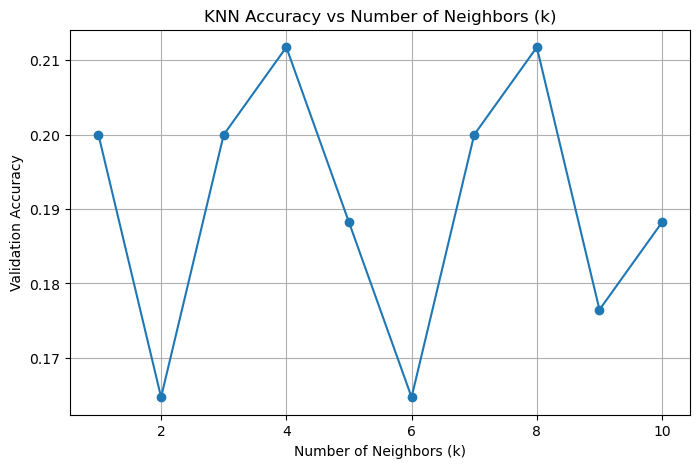

In [61]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def plot_knn_performance(X_train, y_train, X_val, y_val, k_values):
    """Plot KNN validation accuracy for different k values."""
    accuracies = []

    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        accuracies.append(acc)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, accuracies, marker='o')
    plt.title('KNN Accuracy vs Number of Neighbors (k)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Validation Accuracy')
    plt.grid(True)
    plt.show()

k_values = list(range(1, 11))
plot_knn_performance(X_train, y_train, X_val, y_val, k_values)
